In [65]:


import numpy as np 
import pandas as pd

df = pd.read_csv('/kaggle/input/udea-ai-4-eng-20251-pruebas-saber-pro-colombia/train.csv')
df.head()



,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [66]:
columnas = df.columns
columnas_lista = df.columns.tolist()
print(columnas_lista)


['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2', 'coef_3', 'coef_4']


In [67]:
contar_rendimiento = df.groupby('RENDIMIENTO_GLOBAL')['ID'].count()
print("\nCantidad de estudiantes por rendimiento:")
print(contar_rendimiento)



Cantidad de estudiantes por rendimiento:
RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-alto    171619
medio-bajo    172275
Name: ID, dtype: int64


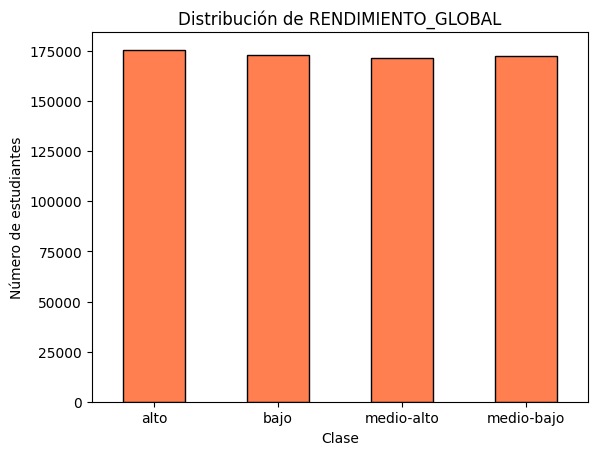

In [68]:
import matplotlib.pyplot as plt
contar_rendimiento.plot(kind="bar", color="coral", edgecolor="black")
plt.title("Distribución de RENDIMIENTO_GLOBAL")
plt.xlabel("Clase")
plt.ylabel("Número de estudiantes")
plt.xticks(rotation=0)
plt.show()

In [69]:
cantidad_departamento = df['ESTU_PRGM_DEPARTAMENTO'].value_counts()
print("\nCantidad de estudiantes por departamento:")
print(cantidad_departamento)


Cantidad de estudiantes por departamento:
ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64


In [70]:
tabla_departamentos = df.groupby(["ESTU_PRGM_DEPARTAMENTO", "RENDIMIENTO_GLOBAL"]).size().unstack(fill_value=0)
tabla_departamentos["TOTAL"] = tabla_departamentos.sum(axis=1)
print("\nCantidad de estudiantes por clase de rendimiento por departamento:")
print(tabla_departamentos)


Cantidad de estudiantes por clase de rendimiento por departamento:
RENDIMIENTO_GLOBAL       alto   bajo  medio-alto  medio-bajo   TOTAL
ESTU_PRGM_DEPARTAMENTO                                              
AMAZONAS                    1     17           6          16      40
ANTIOQUIA               25688  17217       21657       19045   83607
ARAUCA                     33    283          92         181     589
ATLANTICO               10165  11159        9484       10212   41020
BOGOTÁ                  77388  66721       69215       68835  282159
BOLIVAR                  3816   6577        4758        5478   20629
BOYACA                   3770   2338        4440        3500   14048
CALDAS                   3751   1916        3313        2660   11640
CAQUETA                   283    979         568         829    2659
CASANARE                  193    589         477         593    1852
CAUCA                    1981   3480        2708        3302   11471
CESAR                     944   287

In [71]:
acceso_internet = df['FAMI_TIENEINTERNET'].value_counts()

print("\nCantidad de estudiantes con acceso a Internet en casa:")
print(acceso_internet)


Cantidad de estudiantes con acceso a Internet en casa:
FAMI_TIENEINTERNET
Si    592514
No     73357
Name: count, dtype: int64


In [72]:
educacion_padre = df['FAMI_EDUCACIONPADRE'].value_counts()

educacion_madre = df['FAMI_EDUCACIONMADRE'].value_counts()

print("\nCantidad de estudiantes según nivel educativo del padre:")
print(educacion_padre)

print("\nCantidad de estudiantes según nivel educativo de la madre:")
print(educacion_madre)


Cantidad de estudiantes según nivel educativo del padre:
FAMI_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Primaria completa                        55958
Postgrado                                44169
Educación profesional incompleta         27084
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
No sabe                                  16592
No Aplica                                 9229
Name: count, dtype: int64

Cantidad de estudiantes según nivel educativo de la madre:
FAMI_EDUCACIONMADRE
Secundaria (Bachillerato) completa      141744
Primaria incompleta                      99420
Técnica o tecnológica completa           89542
Educación profesional completa           85326
Secundaria (Bachillerato) incompleta     81012
Primaria completa